In [5]:
import os
from joblib import load
import numpy as np

#random220w24_200
#random220wrandom_500
#randomctr220wRand_200s8_30valid_2021  !!

user_dir = os.path.expanduser('~')
file_path = os.path.join(user_dir, 'iCloudDrive\Joblib BA\Hyperparam', 'randomctr220wRand_200s8_30valid_2021.joblib')
loaded_vars_rndHyperparam = load(file_path)

sorted_best_runs, country_to_plot, prediction_year, s = loaded_vars_rndHyperparam

Platz 1 - Bewertung: 279|Test loss: 283 - Hyperparameter: {'wmax': 12, 'numbHiddenL': 5, 'relNeurons': 0.58, 'lr': 0.134, 'featureSubset': 'wdi', 'batch_size': 6, 'dropoutrate': 0, 'epochs': 3, 'numbNeurons': 293.0, 'w': 12}
Platz 2 - Bewertung: 330|Test loss: 441 - Hyperparameter: {'wmax': 3, 'numbHiddenL': 5, 'relNeurons': 0.3, 'lr': 0.136, 'featureSubset': 'wdi', 'batch_size': 3, 'dropoutrate': 0.42, 'epochs': 4, 'numbNeurons': 123.0, 'w': 3}
Platz 3 - Bewertung: 375|Test loss: 260 - Hyperparameter: {'wmax': 5, 'numbHiddenL': 6, 'relNeurons': 0.67, 'lr': 0.136, 'featureSubset': 'wdi', 'batch_size': 5, 'dropoutrate': 0, 'epochs': 4, 'numbNeurons': 184.0, 'w': 5}
Platz 4 - Bewertung: 411|Test loss: 479 - Hyperparameter: {'wmax': 11, 'numbHiddenL': 6, 'relNeurons': 0.35, 'lr': 0.072, 'featureSubset': 'wdi', 'batch_size': 2, 'dropoutrate': 0, 'epochs': 4, 'numbNeurons': 246.0, 'w': 11}
Platz 5 - Bewertung: 420|Test loss: 67 - Hyperparameter: {'wmax': 8, 'numbHiddenL': 1, 'relNeurons': 0

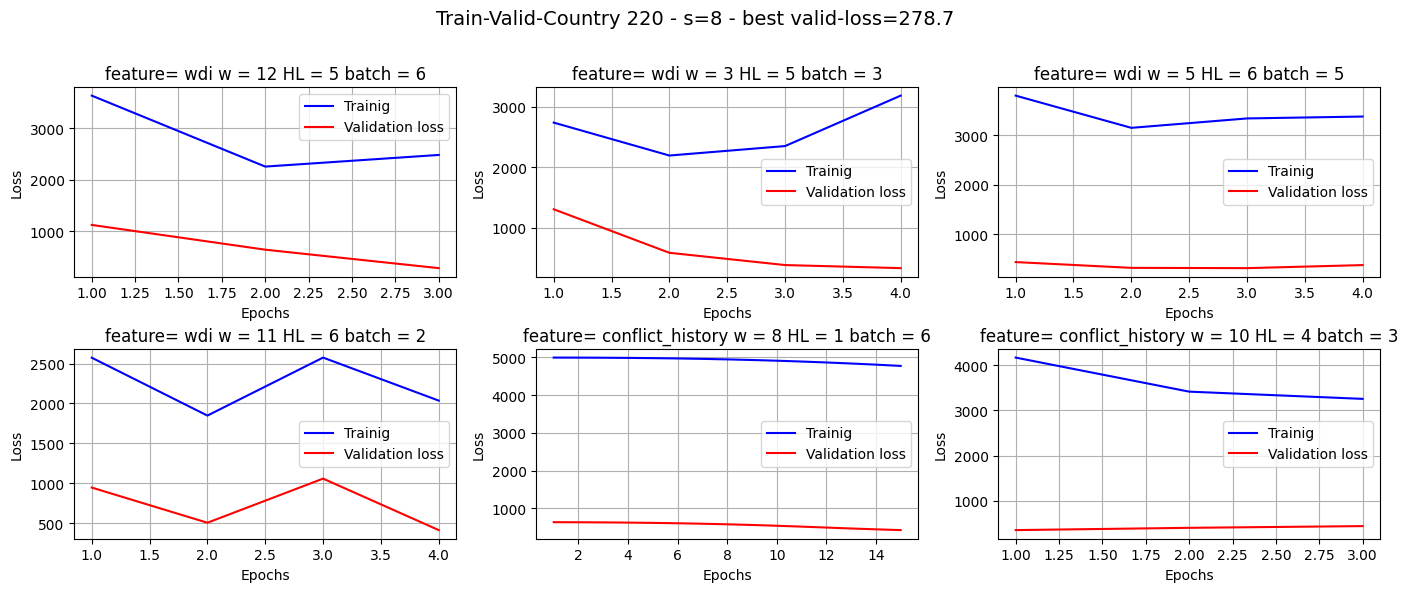

In [6]:
import numpy as np
import matplotlib.pyplot as plt

number_best_runs = 6
for i in range(number_best_runs):
    print(f"Platz {i+1} - Bewertung: {round(sorted_best_runs[i]['val_loss'][-1])}|Test loss: {round(sorted_best_runs[i]['crps_prediction'])} - Hyperparameter: {sorted_best_runs[i]['random_params']}")


country_index = 0

# Erstelle eine Figur mit 1 Zeile und 3 Spalten für die beiden Plots nebeneinander und kleiner
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))

title_string = 'Train-Valid-Country ' + str(country_to_plot) + ' - s=' + str(s) + ' - best valid-loss=' + str(round(sorted_best_runs[0]['val_loss'][-1],1))

i = 0 #zeile
j = 0 #spalte

for k in range(number_best_runs):

    best_run = sorted_best_runs[k]

    loss = best_run['loss']
    val_loss = best_run['val_loss']
    epochs = best_run['epochs']
        
    axes[i][j].plot(epochs, loss, color='blue', label='Trainig')
    axes[i][j].plot(epochs, val_loss, color='red', label='Validation loss')
    axes[i][j].set_title('feature= ' + str(best_run['random_params']['featureSubset']) + ' w = ' + str(best_run['random_params']['w']) + ' HL = ' + str(best_run['random_params']['numbHiddenL']) + ' batch = ' + str(best_run['random_params']['batch_size']) )
    axes[i][j].set_xlabel('Epochs')
    axes[i][j].set_ylabel('Loss')
    axes[i][j].legend()
    axes[i][j].grid(True)
    if j == 2:
        i += 1
        j = 0
    else:  
        j += 1

plt.tight_layout()  # Optimiere den Abstand zwischen den Subplots
plt.subplots_adjust(top=0.85)  # Mache Platz für den Haupttitel außerhalb des Plotbereichs
fig.suptitle(title_string, y=0.98, fontsize=14)
plt.show()

In [7]:
sorted_best_runs[0]

{'loss': [3632.386474609375, 2252.9560546875, 2479.11865234375],
 'val_loss': [1118.574951171875, 637.4208984375, 278.7450256347656],
 'epochs': range(1, 4),
 'y_true': 148.0,
 'crps_prediction': 283.057225,
 'random_params': {'wmax': 12,
  'numbHiddenL': 5,
  'relNeurons': 0.58,
  'lr': 0.134,
  'featureSubset': 'wdi',
  'batch_size': 6,
  'dropoutrate': 0,
  'epochs': 3,
  'numbNeurons': 293.0,
  'w': 12},
 'seed': 139}